In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load JSON data
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Discurweper.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']
        bbox = annotation['bbox']

        if len(keypoints) % 3 != 0:
            # Skip invalid keypoints
            print(f"Skipping invalid keypoints in segment: {segment}")
            continue

        # Normalize keypoints using bbox dimensions
        normalized_keypoints = []
        for i in range(0, len(keypoints), 3):
            x = keypoints[i] / bbox[2]  # Normalize x by width
            y = keypoints[i + 1] / bbox[3]  # Normalize y by height
            visibility = keypoints[i + 2]  # Visibility
            normalized_keypoints.extend([x, y, visibility])

        if len(normalized_keypoints) == 51:  # Ensure all entries are of the same length
            features.append(normalized_keypoints)
            scores.append(details['score'])

# Convert to NumPy arrays
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Check consistency
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
def create_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_dim=input_dim),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize and train the model
model = create_model(X_train.shape[1])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Save the model
model.save("athlete_score_predictor.h5")


Shape of X: (2075, 51), Shape of y: (2075,)
Epoch 1/50


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/52 ━━━━━━━━━━━━━━━━━━━━ 37s 736ms/step - loss: 9.2963 - mae: 2.7614

InvalidArgumentError: Graph execution error:

Detected at node adam/Mul_39 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/anaconda3/envs/athletes/lib/python3.12/asyncio/base_events.py", line 640, in run_forever

  File "/opt/anaconda3/envs/athletes/lib/python3.12/asyncio/base_events.py", line 1992, in _run_once

  File "/opt/anaconda3/envs/athletes/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/yh/61qhjdf50_74bpxh_zh688bm0000gn/T/ipykernel_3384/182883040.py", line 64, in <module>

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 80, in train_step

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 383, in apply_gradients

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 448, in apply

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 511, in _backend_apply_gradients

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/optimizer.py", line 120, in _backend_update_step

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/optimizer.py", line 134, in _distributed_tf_update_step

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/optimizer.py", line 131, in apply_grad_to_update_var

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/optimizers/adam.py", line 148, in update_step

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/ops/numpy.py", line 6016, in multiply

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/sparse.py", line 627, in sparse_wrapper

  File "/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/backend/tensorflow/numpy.py", line 523, in multiply

Incompatible shapes: [64] vs. [0]
	 [[{{node adam/Mul_39}}]] [Op:__inference_multi_step_on_iterator_2721]

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.0191 - mae: 1.4239 - val_loss: 5.5599 - val_mae: 2.1272
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5189 - mae: 1.0041 - val_loss: 3.8408 - val_mae: 1.7279
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3721 - mae: 0.9597 - val_loss: 2.8792 - val_mae: 1.4619
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2794 - mae: 0.9312 - val_loss: 1.8681 - val_mae: 1.1625
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2599 - mae: 0.8957 - val_loss: 1.5366 - val_mae: 1.0355
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1541 - mae: 0.8727 - val_loss: 1.1899 - val_mae: 0.9219
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2758 - mae: 0.9139 - val_loss: 1.2230 - val_mae: 0.9000
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1725 - mae: 0.8773 - val_loss: 1.0286 - val_mae: 0.8341
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1381 - mae: 

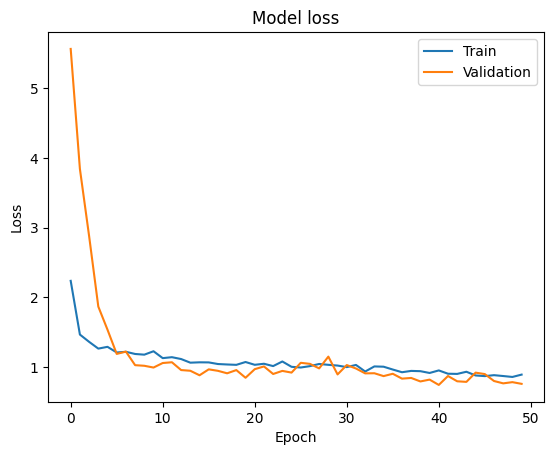

In [ ]:
import matplotlib.pyplot as plt

# Initialize and train the model
model = create_model(X_train.shape[1])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from ultralytics import YOLO
import cv2

# Load the YOLOv8 model for pose detection
model = YOLO('yolov8s-pose.pt')  # Load the YOLOv8 pose model

# Open video capture
video_path = '/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/Discurweper/segment_001557.mp4'
cap = cv2.VideoCapture(video_path)

frame_idx = 0
keypoints_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run pose detection on the frame
    results = model(frame)

    # Extract keypoints for each detected person
    for result in results:  # loop over detections
        keypoints = result.keypoints  # Extract keypoints (x, y, visibility)
        bbox = result.boxes.xywh[0].cpu().numpy()  # Bounding box (x, y, w, h)

        # Ensure keypoints are valid and normalize them
        if len(keypoints) % 3 == 0:
            normalized_keypoints = []
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize x by width
                y = keypoints[i + 1] / bbox[3]  # Normalize y by height
                visibility = keypoints[i + 2]  # Visibility
                normalized_keypoints.extend([x, y, visibility])

            keypoints_data.append(normalized_keypoints)

    frame_idx += 1

# Close video capture
cap.release()


0: 640x640 1 person, 516.9ms
Speed: 23.6ms preprocess, 516.9ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 344.4ms
Speed: 4.8ms preprocess, 344.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 417.5ms
Speed: 3.5ms preprocess, 417.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 430.4ms
Speed: 2.9ms preprocess, 430.4ms inference, 13.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 371.2ms
Speed: 32.4ms preprocess, 371.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 467.7ms
Speed: 3.5ms preprocess, 467.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 470.8ms
Speed: 3.9ms preprocess, 470.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 469.8ms
Speed: 3.9ms preprocess, 469.8ms inference, 1.6ms postprocess per image

In [6]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Discurweper.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 3  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define the scoring model
def create_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_dim=input_dim),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize and train the model
model = create_model(X_train.shape[1])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Save the model
model.save("athlete_score_predictor.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/Discurweper/segment_004494.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at scoring_scaler7.pkl
Epoch 1/50


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1836 - mae: 1.6963 - val_loss: 4.5218 - val_mae: 1.9029
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7908 - mae: 1.0804 - val_loss: 2.9630 - val_mae: 1.5138
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4563 - mae: 0.9902 - val_loss: 2.1532 - val_mae: 1.2722
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3846 - mae: 0.9547 - val_loss: 1.5149 - val_mae: 1.0557
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4178 - mae: 0.9786 - val_loss: 1.3763 - val_mae: 1.0029
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3673 - mae: 0.9597 - val_loss: 1.4065 - val_mae: 0.9923
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2975 - mae: 0.9405 - val_loss: 1.1665 - val_mae: 0.9004
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2984 - mae: 0.9177 - val_loss: 1.2713 - val_mae: 0.9308
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2083 - mae: 0.8920 - va

Test Loss: 1.0792, Test MAE: 0.8183


100%|██████████| 6.52M/6.52M [00:01<00:00, 3.76MB/s]



0: 384x640 2 persons, 46.4ms
Speed: 2.3ms preprocess, 46.4ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

0: 384x640 2 persons, 43.0ms
Speed: 0.8ms preprocess, 43.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

0: 384x640 2 persons, 62.5ms
Speed: 0.7ms preprocess, 62.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

0: 384x640 2 persons, 69.1ms
Speed: 1.3ms preprocess, 69.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 2 persons, 41.5ms
Speed: 0.8ms preprocess, 41.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 2 persons, 35.6ms
Speed: 0.8ms preprocess, 35.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x64

2025-01-21 09:40:37.243 python[3384:45511] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-21 09:40:37.243 python[3384:45511] +[IMKInputSession subclass]: chose IMKInputSession_Modern


0: 384x640 2 persons, 34.4ms
Speed: 0.7ms preprocess, 34.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

0: 384x640 1 person, 33.9ms
Speed: 0.8ms preprocess, 33.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

0: 384x640 1 person, 33.4ms
Speed: 0.7ms preprocess, 33.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

0: 384x640 1 person, 33.7ms
Speed: 0.8ms preprocess, 33.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 1 person, 35.1ms
Speed: 0.7ms preprocess, 35.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 1 person, 41.2ms
Speed: 0.7ms preprocess, 41.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 1 pe

In [9]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Discurweper.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 3  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define a more complex model with added LSTM layers for sequential data
def create_model(input_dim):
    model = tf.keras.Sequential([
        # Reshape the input to be 3D for LSTM
        tf.keras.layers.Reshape((1, input_dim), input_shape=(input_dim,)),  # Reshape to (1, features)
        
        # LSTM layer for sequential data (even though you have one timestep)
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        
        # Dense layers for feature learning
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Initialize and train the model with early stopping
model = create_model(X_train.shape[1])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Calculate R² score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Save the model
model.save("Discurweper.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/Discurweper/segment_010422.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at /Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl
Epoch 1/100


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.3875 - mae: 1.9511 - val_loss: 6.2155 - val_mae: 2.2369
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7110 - mae: 1.0674 - val_loss: 4.9363 - val_mae: 1.9622
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3115 - mae: 0.9403 - val_loss: 3.8261 - val_mae: 1.7333
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3781 - mae: 0.9514 - val_loss: 3.1125 - val_mae: 1.5539
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3576 - mae: 0.9582 - val_loss: 2.5285 - val_mae: 1.3826
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1884 - mae: 0.8927 - val_loss: 2.0929 - val_mae: 1.2511
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1636 - mae: 0.8785 - val_loss: 1.8437 - val_mae: 1.1932
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0607 - mae: 0.8395 - val_loss: 1.7581 - val_mae: 1.1599
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1923 - mae: 0.8

R² Score: 0.2774

0: 384x640 1 person, 177.0ms
Speed: 6.2ms preprocess, 177.0ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

0: 384x640 1 person, 141.5ms
Speed: 15.9ms preprocess, 141.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

0: 384x640 1 person, 74.2ms
Speed: 1.4ms preprocess, 74.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

0: 384x640 1 person, 82.4ms
Speed: 1.5ms preprocess, 82.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

0: 384x640 1 person, 84.9ms
Speed: 1.8ms preprocess, 84.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

0: 384x640 1 person, 75.7ms
Speed: 1.6ms preprocess, 75.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51m

In [18]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Discurweper.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 2  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define a more complex model with added LSTM layers for sequential data
def create_model(input_dim):
    model = tf.keras.Sequential([
        # Reshape the input to be 3D for LSTM
        tf.keras.layers.Reshape((1, input_dim), input_shape=(input_dim,)),  # Reshape to (1, features)
        
        # LSTM layer for sequential data (even though you have one timestep)
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        
        # Dense layers for feature learning
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Initialize and train the model with early stopping
model = create_model(X_train.shape[1])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Calculate R² score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Save the model
model.save("Estafette.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/Estafette/segment_002126.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at /Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.3347 - mae: 1.9482 - val_loss: 6.5414 - val_mae: 2.3070
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7458 - mae: 1.0710 - val_loss: 5.2133 - val_mae: 2.0186
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4795 - mae: 1.0107 - val_loss: 4.1664 - val_mae: 1.8005
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4561 - mae: 0.9927 - val_loss: 2.8052 - val_mae: 1.4611
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2303 - mae: 0.9021 - val_loss: 2.2459 - val_mae: 1.2871
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1548 - mae: 0.8696 - val_loss: 1.8933 - val_mae: 1.1969
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1047 - mae: 0.8457 - val_loss: 1.6404 - val_mae: 1.1280
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0580 - mae: 0.8334 - val_loss: 1.4455 - val_mae: 1.0446
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.036

R² Score: 0.6249

0: 640x640 1 person, 88.8ms
Speed: 5.6ms preprocess, 88.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

0: 640x640 (no detections), 128.7ms
Speed: 1.7ms preprocess, 128.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 79.8ms
Speed: 1.4ms preprocess, 79.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

0: 640x640 1 person, 70.6ms
Speed: 1.8ms preprocess, 70.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 71.7ms
Speed: 1.4ms preprocess, 71.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 63.8ms
Speed: 1.6ms preprocess, 63.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Average Score for the Video:

In [19]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Hoogspringen.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 2  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define a more complex model with added LSTM layers for sequential data
def create_model(input_dim):
    model = tf.keras.Sequential([
        # Reshape the input to be 3D for LSTM
        tf.keras.layers.Reshape((1, input_dim), input_shape=(input_dim,)),  # Reshape to (1, features)
        
        # LSTM layer for sequential data (even though you have one timestep)
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        
        # Dense layers for feature learning
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Initialize and train the model with early stopping
model = create_model(X_train.shape[1])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Calculate R² score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Save the model
model.save("Hoogspringen.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/Hoogspringen/segment_001127.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at /Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl
Epoch 1/100


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.7797 - mae: 2.2122 - val_loss: 7.7235 - val_mae: 2.5017
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9416 - mae: 1.1000 - val_loss: 6.4972 - val_mae: 2.2623
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7563 - mae: 1.0302 - val_loss: 5.7327 - val_mae: 2.1116
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5789 - mae: 0.9622 - val_loss: 4.9337 - val_mae: 1.9350
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5000 - mae: 0.9622 - val_loss: 3.9127 - val_mae: 1.6887
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5460 - mae: 0.9695 - val_loss: 3.6337 - val_mae: 1.6178
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4659 - mae: 0.9262 - val_loss: 2.8420 - val_mae: 1.3921
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3253 - mae: 0.8785 - val_loss: 2.1043 - val_mae: 1.1514
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3258 - mae: 0.8

R² Score: 0.3796

0: 640x640 1 person, 95.4ms
Speed: 2.2ms preprocess, 95.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 95.9ms
Speed: 1.6ms preprocess, 95.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

0: 640x640 1 person, 81.0ms
Speed: 1.8ms preprocess, 81.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

0: 640x640 1 person, 69.2ms
Speed: 1.7ms preprocess, 69.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 73.3ms
Speed: 1.5ms preprocess, 73.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

0: 640x640 1 person, 74.6ms
Speed: 1.5ms preprocess, 74.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

In [20]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Hordenlopen.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 2  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define a more complex model with added LSTM layers for sequential data
def create_model(input_dim):
    model = tf.keras.Sequential([
        # Reshape the input to be 3D for LSTM
        tf.keras.layers.Reshape((1, input_dim), input_shape=(input_dim,)),  # Reshape to (1, features)
        
        # LSTM layer for sequential data (even though you have one timestep)
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        
        # Dense layers for feature learning
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Initialize and train the model with early stopping
model = create_model(X_train.shape[1])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Calculate R² score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Save the model
model.save("Hordelopen.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/Hordenlopen/segment_001695.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at /Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl
Epoch 1/100


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 10.0488 - mae: 2.7925 - val_loss: 9.2864 - val_mae: 2.8450
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3339 - mae: 1.2088 - val_loss: 7.7993 - val_mae: 2.5881
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8054 - mae: 1.0525 - val_loss: 6.3457 - val_mae: 2.3112
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7212 - mae: 1.0202 - val_loss: 5.2424 - val_mae: 2.0692
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4455 - mae: 0.9262 - val_loss: 3.9186 - val_mae: 1.7359
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5452 - mae: 0.9708 - val_loss: 3.1605 - val_mae: 1.5263
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2023 - mae: 0.8511 - val_loss: 2.7121 - val_mae: 1.3889
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1508 - mae: 0.8099 - val_loss: 2.0498 - val_mae: 1.1532
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0739 - mae: 0.



0: 384x640 1 person, 52.0ms
Speed: 0.9ms preprocess, 52.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

0: 384x640 1 person, 56.7ms
Speed: 2.0ms preprocess, 56.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

0: 384x640 1 person, 60.7ms
Speed: 0.9ms preprocess, 60.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

0: 384x640 1 person, 66.0ms
Speed: 0.9ms preprocess, 66.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

0: 384x640 1 person, 49.1ms
Speed: 1.2ms preprocess, 49.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

0: 384x640 1 person, 46.1ms
Speed: 0.7ms preprocess, 46.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 1 

In [21]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Kogelstoten.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 2  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define a more complex model with added LSTM layers for sequential data
def create_model(input_dim):
    model = tf.keras.Sequential([
        # Reshape the input to be 3D for LSTM
        tf.keras.layers.Reshape((1, input_dim), input_shape=(input_dim,)),  # Reshape to (1, features)
        
        # LSTM layer for sequential data (even though you have one timestep)
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        
        # Dense layers for feature learning
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Initialize and train the model with early stopping
model = create_model(X_train.shape[1])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Calculate R² score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Save the model
model.save("Kogelstoten.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/Kogelstoten/segment_000265.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at /Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl
Epoch 1/100


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.7957 - mae: 2.5806 - val_loss: 8.6824 - val_mae: 2.7881
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5307 - mae: 0.9772 - val_loss: 7.9351 - val_mae: 2.6581
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1255 - mae: 0.8272 - val_loss: 6.4055 - val_mae: 2.3625
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0359 - mae: 0.7898 - val_loss: 5.2709 - val_mae: 2.1336
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9907 - mae: 0.7929 - val_loss: 4.1137 - val_mae: 1.8765
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7679 - mae: 0.6714 - val_loss: 2.7977 - val_mae: 1.5357
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6970 - mae: 0.6451 - val_loss: 2.0612 - val_mae: 1.2954
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6998 - mae: 0.6459 - val_loss: 1.5963 - val_mae: 1.1317
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6534 - mae: 0.6

R² Score: 0.5620

0: 384x640 3 persons, 53.2ms
Speed: 0.8ms preprocess, 53.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

0: 384x640 3 persons, 61.2ms
Speed: 1.4ms preprocess, 61.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

0: 384x640 3 persons, 40.7ms
Speed: 0.7ms preprocess, 40.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

0: 384x640 3 persons, 45.6ms
Speed: 0.8ms preprocess, 45.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

0: 384x640 3 persons, 46.7ms
Speed: 1.1ms preprocess, 46.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 3 persons, 44.7ms
Speed: 0.8ms preprocess, 44.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14m

In [22]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Speerwerpen.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 2  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define a more complex model with added LSTM layers for sequential data
def create_model(input_dim):
    model = tf.keras.Sequential([
        # Reshape the input to be 3D for LSTM
        tf.keras.layers.Reshape((1, input_dim), input_shape=(input_dim,)),  # Reshape to (1, features)
        
        # LSTM layer for sequential data (even though you have one timestep)
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        
        # Dense layers for feature learning
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Initialize and train the model with early stopping
model = create_model(X_train.shape[1])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Calculate R² score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Save the model
model.save("Speerwerpen.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/Speerwerpen/segment_000734.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at /Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl
Epoch 1/100


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.5470 - mae: 2.2111 - val_loss: 7.8280 - val_mae: 2.5890
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5873 - mae: 1.0306 - val_loss: 6.1945 - val_mae: 2.2785
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3856 - mae: 0.9501 - val_loss: 4.8441 - val_mae: 2.0252
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2058 - mae: 0.8803 - val_loss: 3.5392 - val_mae: 1.7292
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9864 - mae: 0.7907 - val_loss: 2.9282 - val_mae: 1.5856
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8844 - mae: 0.7533 - val_loss: 2.3039 - val_mae: 1.4008
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8963 - mae: 0.7413 - val_loss: 1.7285 - val_mae: 1.2115
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8331 - mae: 0.7128 - val_loss: 1.7492 - val_mae: 1.2050
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8734 - mae: 0.7

R² Score: 0.7772

0: 384x640 2 persons, 54.0ms
Speed: 0.9ms preprocess, 54.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 2 persons, 55.5ms
Speed: 1.0ms preprocess, 55.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

0: 384x640 2 persons, 64.8ms
Speed: 1.4ms preprocess, 64.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 2 persons, 49.8ms
Speed: 0.8ms preprocess, 49.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

0: 384x640 1 person, 54.6ms
Speed: 1.0ms preprocess, 54.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 1 person, 37.4ms
Speed: 0.7ms preprocess, 37.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/

In [23]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Sprint_Start.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 2  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define a more complex model with added LSTM layers for sequential data
def create_model(input_dim):
    model = tf.keras.Sequential([
        # Reshape the input to be 3D for LSTM
        tf.keras.layers.Reshape((1, input_dim), input_shape=(input_dim,)),  # Reshape to (1, features)
        
        # LSTM layer for sequential data (even though you have one timestep)
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        
        # Dense layers for feature learning
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Initialize and train the model with early stopping
model = create_model(X_train.shape[1])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Calculate R² score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Save the model
model.save("Sprint_Start.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/sprint_start/segment_000091.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at /Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl
Epoch 1/100


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10.0793 - mae: 2.8154 - val_loss: 10.5913 - val_mae: 3.1897
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1250 - mae: 0.8297 - val_loss: 7.6764 - val_mae: 2.6883
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9721 - mae: 0.7676 - val_loss: 4.7291 - val_mae: 2.0643
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8672 - mae: 0.7441 - val_loss: 2.9651 - val_mae: 1.5753
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6563 - mae: 0.6421 - val_loss: 1.6940 - val_mae: 1.1279
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5828 - mae: 0.6061 - val_loss: 0.9799 - val_mae: 0.8616
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5771 - mae: 0.5979 - val_loss: 0.6284 - val_mae: 0.6408
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4699 - mae: 0.5417 - val_loss: 0.4440 - val_mae: 0.5441
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4958 - mae: 0

R² Score: 0.5205

0: 640x640 1 person, 86.3ms
Speed: 3.1ms preprocess, 86.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 76.9ms
Speed: 2.1ms preprocess, 76.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

0: 640x640 1 person, 68.4ms
Speed: 1.8ms preprocess, 68.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

0: 640x640 1 person, 58.8ms
Speed: 1.4ms preprocess, 58.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 60.3ms
Speed: 1.3ms preprocess, 60.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 59.7ms
Speed: 1.3ms preprocess, 59.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

In [24]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Sprint.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 2  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define a more complex model with added LSTM layers for sequential data
def create_model(input_dim):
    model = tf.keras.Sequential([
        # Reshape the input to be 3D for LSTM
        tf.keras.layers.Reshape((1, input_dim), input_shape=(input_dim,)),  # Reshape to (1, features)
        
        # LSTM layer for sequential data (even though you have one timestep)
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        
        # Dense layers for feature learning
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Initialize and train the model with early stopping
model = create_model(X_train.shape[1])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Calculate R² score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Save the model
model.save("Sprint.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/sprint/segment_000671.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at /Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl
Epoch 1/100


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.0018 - mae: 2.6548 - val_loss: 11.0403 - val_mae: 3.1718
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8415 - mae: 1.0687 - val_loss: 8.9501 - val_mae: 2.8419
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5177 - mae: 0.9672 - val_loss: 7.7660 - val_mae: 2.6401
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4378 - mae: 0.9612 - val_loss: 5.5853 - val_mae: 2.1848
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1954 - mae: 0.8617 - val_loss: 4.0846 - val_mae: 1.8142
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0949 - mae: 0.8246 - val_loss: 3.5878 - val_mae: 1.6930
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1045 - mae: 0.8215 - val_loss: 2.6179 - val_mae: 1.4105
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9452 - mae: 0.7457 - val_loss: 2.1790 - val_mae: 1.2786
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8674 - mae: 0.

R² Score: 0.6088

0: 384x640 1 person, 49.6ms
Speed: 0.8ms preprocess, 49.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 384x640 1 person, 49.2ms
Speed: 1.1ms preprocess, 49.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Average Score for the Video: 4.50


In [25]:
import cv2
import numpy as np
import json
import tensorflow as tf
from ultralytics import YOLO
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import os

# Load JSON data for scoring model
file_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonScore/Verspringen.json"
with open(file_path, 'r') as f:
    data = json.load(f)

# Define the expected number of keypoints (e.g., 17 keypoints, each with x, y, and visibility)
expected_keypoints = 17
expected_size = expected_keypoints * 2  # Each keypoint has x, y, visibility (3 values)

# Extract features (keypoints) and labels (scores)
features = []
scores = []

for segment, details in data['segments'].items():
    for annotation in details['annotations']:
        keypoints = annotation['keypoints']  # Flatten keypoints
        normalized_keypoints = []

        # Normalize using bbox dimensions
        bbox = annotation['bbox']
        
        # Ensure that keypoints contain a valid number of elements (x, y, and visibility for each keypoint)
        if len(keypoints) % 3 == 0:  # Check that each keypoint has x, y, and visibility
            for i in range(0, len(keypoints), 3):
                x = keypoints[i] / bbox[2]  # Normalize by width
                y = keypoints[i + 1] / bbox[3]  # Normalize by height
                visibility = keypoints[i + 2]  # Keep visibility as-is
                normalized_keypoints.extend([x, y, visibility])

            # Pad or trim the keypoints list to the expected size
            if len(normalized_keypoints) > expected_size:
                normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
            elif len(normalized_keypoints) < expected_size:
                normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

            features.append(normalized_keypoints)
            scores.append(details['score'])
        else:
            print(f"Skipping annotation with invalid keypoint length: {len(keypoints)}")

# Convert to NumPy arrays (after ensuring consistency)
X = np.array(features, dtype=np.float32)
y = np.array(scores, dtype=np.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler and save the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
scaler_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl"  # Correct path for saving the scaler
joblib.dump(scaler, scaler_path)  # Save the scaler
print(f"Scaler saved at {scaler_path}")

# Define a more complex model with added LSTM layers for sequential data
def create_model(input_dim):
    model = tf.keras.Sequential([
        # Reshape the input to be 3D for LSTM
        tf.keras.layers.Reshape((1, input_dim), input_shape=(input_dim,)),  # Reshape to (1, features)
        
        # LSTM layer for sequential data (even though you have one timestep)
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(64, activation='relu'),
        
        # Dense layers for feature learning
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Initialize and train the model with early stopping
model = create_model(X_train.shape[1])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Calculate R² score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Save the model
model.save("Verspringen.h5")

# Load YOLO model for pose estimation
pose_model = YOLO("yolov8n-pose.pt")

# Path to the video
video_path = "/Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/exercises/Verspringen/segment_001406.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_scores = []

# Load the saved scaler for normalization of keypoints
if os.path.exists(scaler_path):
    scaler_scoring = joblib.load(scaler_path)
else:
    # If the scaler doesn't exist, fit a new one (this case should not happen if you have already saved it)
    scaler_scoring = MinMaxScaler(feature_range=(0, 1))
    scaler_scoring.fit(X)  # Use `X` as the keypoints data
    joblib.dump(scaler_scoring, scaler_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Extract Keypoints
    results = pose_model(frame)
    if len(results) == 0 or results[0].keypoints is None:
        continue

    keypoints = results[0].keypoints.xy.cpu().numpy().flatten()  # x, y coordinates
    if len(keypoints) == 0:
        continue  # Skip frames without valid keypoints

    # Step 2: Normalize keypoints using bounding box dimensions
    bbox = results[0].boxes.xyxy.cpu().numpy()[0]  # x_min, y_min, x_max, y_max
    if bbox is None or len(bbox) != 4:
        continue  # Skip frames without valid bbox

    normalized_keypoints = []
    for i in range(0, len(keypoints), 2):  # Assuming keypoints are in x, y pairs
        x = keypoints[i] / bbox[2]  # Normalize by width
        y = keypoints[i + 1] / bbox[3]  # Normalize by height
        normalized_keypoints.extend([x, y])

    # Pad or trim the normalized keypoints to match the expected feature size (51 values)
    if len(normalized_keypoints) > expected_size:
        normalized_keypoints = normalized_keypoints[:expected_size]  # Trim if too long
    elif len(normalized_keypoints) < expected_size:
        normalized_keypoints += [0] * (expected_size - len(normalized_keypoints))  # Pad if too short

    # Step 3: Predict Score using the trained scoring model
    normalized_keypoints = np.array([normalized_keypoints], dtype=np.float32)

    # Normalize the features using the saved scaler
    normalized_keypoints = scaler_scoring.transform(normalized_keypoints)

    # Predict score from the model
    score = model.predict(normalized_keypoints).flatten()[0]

    # Clip the predicted score to ensure it's between 1 and 5
    score = np.clip(score, 1, 5)

    # Round the score to the nearest 0.5
    rounded_score = round(score * 2) / 2
    frame_scores.append(rounded_score)

    # Step 4: Annotate the frame with the score
    cv2.putText(frame, f"Score: {rounded_score:.2f}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show frame
    frame_count += 1
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Step 5: Aggregate Results
average_score = np.mean(frame_scores) if frame_scores else 0
print(f"Average Score for the Video: {average_score:.2f}")


Scaler saved at /Users/alessiacolumban/Desktop/TeamProject-GradindSysAthletes/Athletes/KeypointDetection/JsonKeypoints/Testing/scoring_scaler7.pkl
Epoch 1/100


/opt/anaconda3/envs/athletes/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 6.8859 - mae: 2.2983 - val_loss: 10.2453 - val_mae: 3.1130
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5475 - mae: 0.9127 - val_loss: 8.3449 - val_mae: 2.7919
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0948 - mae: 0.8239 - val_loss: 6.8892 - val_mae: 2.5224
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0465 - mae: 0.7848 - val_loss: 5.5357 - val_mae: 2.2234
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8600 - mae: 0.7254 - val_loss: 3.7000 - val_mae: 1.7640
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7552 - mae: 0.6811 - val_loss: 2.7870 - val_mae: 1.4695
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7087 - mae: 0.6776 - val_loss: 1.9117 - val_mae: 1.1644
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7056 - mae: 0.6726 - val_loss: 1.3542 - val_mae: 0.9439
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5535 - mae: 0.

R² Score: 0.3487

0: 640x640 1 person, 75.2ms
Speed: 2.3ms preprocess, 75.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 83.1ms
Speed: 2.1ms preprocess, 83.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 75.1ms
Speed: 1.4ms preprocess, 75.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 69.8ms
Speed: 1.4ms preprocess, 69.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 62.3ms
Speed: 1.4ms preprocess, 62.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

0: 640x640 1 person, 66.7ms
Speed: 1.5ms preprocess, 66.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

: 